In [3]:
import pandas as pd
import numpy as np
import random
import io

### Leemos la base de datos a trabajar en nuestra ruta de origen

In [4]:
econdata = pd.read_csv("econdata.csv")

In [5]:
econdata.head(5)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


### Funciones de muestreo

## 1) Muestreo aleatorio simple

In [6]:
aleat_8 = econdata.sample(n=8)
aleat_8

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
63,63,"19.4339116282,-99.1468371035","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_015_07,Cuautémoc,B,Hotel,Calvin
86,86,"19.4244645173,-99.1433325213","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_085_04,Cuautémoc,B,Hotel,San Juan
54,54,"19.4263645964,-99.1399088724","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_076_12,Cuautémoc,B,Hotel,"Cadillac, S.A. DE C.V."
53,53,"19.4419740424,-99.1401449131","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_069_16,Cuautémoc,B,Hotel,Magnolia A
185,185,"19.42697144,-99.1415371446","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_065_14,Cuautémoc,A,Hotel,Virreyes
58,58,"19.4244380424,-99.1306732022","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",307_124_19,Cuautémoc,B,Hotel,Unico
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar


In [7]:
prop_25 = econdata.sample(frac= .25)
prop_25.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
118,118,"19.44371481,-99.14271352","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_050_07,Cuautémoc,B,Hotel,Manolete
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
99,99,"19.4438918423,-99.1402516182","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_052_18,Cuautémoc,B,Hotel,Drigales
170,170,"19.43162145,-99.13535842","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_028_11,Cuautémoc,A,Hotel,NH Hoteles
62,62,"19.4377973772,-99.1504216904","{""type"": ""MultiPoint"", ""coordinates"": [[-99.15...",011_034_16,Cuautémoc,B,Hotel,Ramada Reforma


## 2) Muestreo sistematico

In [8]:
def systematic_sampling(econdata, step):
    indexes = np.arange(0, len(econdata), step= step)
    systematic_sample = econdata.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(econdata, 3)
systematic_sample

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz


## 3) Muestreo estratificado

In [9]:
econdata['estratificado'] = econdata['delegacion'] + "," + econdata['tipo']
(econdata['estratificado'].value_counts()/len(econdata)).sort_values(ascending= False)

Cuautémoc,Hotel                0.643478
Cuautémoc,Museo                0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: estratificado, dtype: float64

Nuestros datos dicen que la proporcion es la siguiente:
1) Hoteles de Cuauhtémoc 0.5
2) Mueseo de Cuauhtémoc 0.2
3) Hoteles de  Venustiana Carranza 0.1
4) Mercados de Cuauhtémoc 0.1 
5) Mercados de Venustiana Carranza 0.1

In [10]:
from dataclasses import replace


def data_estratificada(econdata, nombres_columnas_estrat, valores_estrat, prop_estrat, random_state=None):
    df_estrat = pd.DataFrame(columns= econdata.columns)

    pos = -1
    for i in range(len(valores_estrat)):   
        pos += 1
        if pos == len(valores_estrat) - 1:
            ratio_len = len(econdata) - len(df_estrat)
        else:
            ratio_len = int(len(econdata) * prop_estrat[i])

        df_filtrado = econdata[econdata[nombres_columnas_estrat] == valores_estrat[i]]
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state)

        df_estrat = pd.concat([df_estrat, df_temp])
    return df_estrat 

In [11]:
valores_estrat = ['Cuautémoc,Hotel', 'Cuautémoc,Museo', 'Venustiano Carranza,Hotel', 'Cuauhtémoc,Mercado', 'Venustiano Carranza,Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1, 0.1]
df_estrat = data_estratificada(econdata, 'estratificado', valores_estrat, prop_estrat, random_state = 42)

In [12]:
a = np.array([7, 10, 12, 13, 16, 9, 8, 12, 8, 6, 16, 23, 11, 17, 20, 21, 25, 30, 31, 33, 37, 39, 27, 36, 40, 43, 41, 45])


In [13]:
variance= np.var(a)
desv=np.std(a)
print(variance, desv)

155.06122448979593 12.452358189909088


## Varianza y desviación estandar

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos la base da datos a trabajar en nuestra ruta de origen

In [15]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names = names)

In [16]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


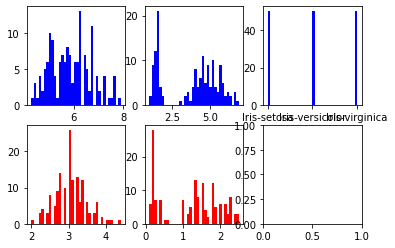

In [47]:
fig, axs = plt.subplots(2,3)
axs[0,0].hist(iris['sepal-length'], color= 'blue', bins= int(180/5))
axs[0,1].hist(iris['petal-length'], color= 'blue', bins= int(180/5))
axs[0,2].hist(iris['class'], color= 'blue', bins= int(180/5))
axs[1,0].hist(iris['sepal-width'], color= 'red', bins= int(180/5))
axs[1,1].hist(iris['petal-width'], color= 'red', bins= int(180/5))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

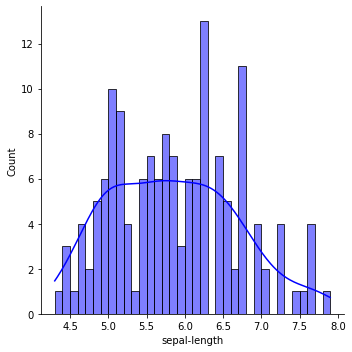

In [42]:

sns.displot(iris['sepal-length'], kde = True, bins = int(180/5), color = 'blue')
plt.show

## Cálculo Varianza

In [49]:
print("sepal-length var:",iris['sepal-length'].var())
print("sepal-width var:",iris['sepal-width'].var())
print("petal-length var:",iris['petal-length'].var())
print("petal-width var:",iris['petal-width'].var())

sepal-length var: 0.6856935123042507
sepal-width var: 0.1880040268456376
petal-length var: 3.113179418344519
petal-width var: 0.582414317673378


## Cálculo de desviación estandar

In [51]:
print("sepal-length std:",iris['sepal-length'].std())
print("sepal-width std:",iris['sepal-width'].std())
print("petal-length std:",iris['petal-length'].std())
print("petal-width std:",iris['petal-width'].std())

sepal-length std: 0.828066127977863
sepal-width std: 0.4335943113621737
petal-length std: 1.7644204199522626
petal-width std: 0.7631607417008411


## Media

In [52]:
print("sepal-length mean:",iris['sepal-length'].mean())
print("sepal-width mean:",iris['sepal-width'].mean())
print("petal-length mean:",iris['petal-length'].mean())
print("petal-width mean:",iris['petal-width'].mean())

sepal-length mean: 5.843333333333334
sepal-width mean: 3.0540000000000003
petal-length mean: 3.758666666666666
petal-width mean: 1.1986666666666668


## Creación de muestra mediante Muestreo Aleatorio Simple

In [35]:
muestra = iris.sample(frac=0.5)
muestra

,sepal-length,sepal-width,petal-length,petal-width,class
147,6.5,3.0,5.2,2.0,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
124,6.7,3.3,5.7,2.1,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
...,...,...,...,...,...
128,6.4,2.8,5.6,2.1,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor
49,5.0,3.3,1.4,0.2,Iris-setosa


## Cálculo de la varianza

In [56]:

print("sepal-length var:",muestra['sepal-length'].var())
print("sepal-width var:",muestra['sepal-width'].var())
print("petal-length var:",muestra['petal-length'].var())
print("petal-width var:",muestra['petal-width'].var())

sepal-length var: 0.631664864864865
sepal-width var: 0.1633081081081081
petal-length var: 3.0895495495495497
petal-width var: 0.5816864864864866


## Cálculo de la desviación estandar

In [55]:

print("sepal-length std:",muestra['sepal-length'].std())
print("sepal-width std:",muestra['sepal-width'].std())
print("petal-length std:",muestra['petal-length'].std())
print("petal-width std:",muestra['petal-width'].std())

sepal-length std: 0.7947734676402233
sepal-width std: 0.40411397910503927
petal-length std: 1.7577114523008461
petal-width std: 0.7626837394926462


In [57]:
muestra['sepal-length'].mean()
print("sepal-length mean:",muestra['sepal-length'].mean())
print("sepal-width mean:",muestra['sepal-width'].mean())
print("petal-length mean:",muestra['petal-length'].mean())
print("petal-width mean:",muestra['petal-width'].mean())

sepal-length mean: 5.932
sepal-width mean: 3.0560000000000005
petal-length mean: 3.8933333333333335
petal-width mean: 1.256


## Intervalos de Confianza

In [58]:
import scipy.stats as st

# Esta prática se realizara sobre una distribución creada por nosotros

In [60]:
np.random.seed(20)
var1 = np.random.randint(0, 10, 10) #Dias vacaciones
var2 = var1+np.random.normal(0, 1, 10) #Dinero gastado

In [61]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5])

In [62]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

## Visualización de un intervalo de confianza del 80%

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


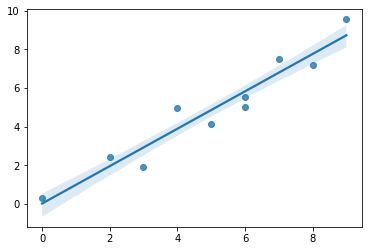

In [64]:
grafico = sns.regplot(var1, var2, ci=80)

In [65]:
tuple=list(zip(var1, var2))
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [67]:
tabla = pd.DataFrame(tuple,columns=["Días de vacaciones", "Dinero gastado"])
tabla

,Días de vacaciones,Dinero gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [68]:
# 0.95%
st.t.interval(alpha= 0.95, df= len(tabla)-1, loc= np.mean(tabla), scale = st.sem(tabla))


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

# Prueba de hipotesis

In [79]:
from scipy import stats
from scipy.stats import f_oneway

In [70]:
#usamos la base de datos iris

## Tipos de pruebas

### a) Distribuvión T de Student

In [88]:
#SE
se_length = iris.std()['sepal-length']/np.sqrt(10)
se_width = iris.std()['sepal-width']/np.sqrt(10)

C:\Users\danie\AppData\Local\Temp\ipykernel_20032\2921155475.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_length = iris.std()['sepal-length']/np.sqrt(10)
C:\Users\danie\AppData\Local\Temp\ipykernel_20032\2921155475.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_width = iris.std()['sepal-width']/np.sqrt(10)


In [89]:
#SE sepal vs petal length
se_se_length = iris.std()['sepal-length']/np.sqrt(10)
se_pe_length = iris.std()['petal-length']/np.sqrt(10)

C:\Users\danie\AppData\Local\Temp\ipykernel_20032\1294123547.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_se_length = iris.std()['sepal-length']/np.sqrt(10)
C:\Users\danie\AppData\Local\Temp\ipykernel_20032\1294123547.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_pe_length = iris.std()['petal-length']/np.sqrt(10)


In [72]:

#SED
sed = np.sqrt((se_length**2)+(se_width**2))


In [90]:
#SED sepal vs petal
sed_sp = np.sqrt((se_se_length**2)+(se_pe_length**2))

In [75]:
t_stat = (iris.mean()['sepal-length']-iris.mean()['sepal-width'])/sed
t_stat

C:\Users\danie\AppData\Local\Temp\ipykernel_20032\1441014764.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t_stat = (iris.mean()['sepal-length']-iris.mean()['sepal-width'])/sed


9.436693738890318

In [93]:
#Sepal vs Petal
t_stat_sp = (iris.mean()['sepal-length']-iris.mean()['petal-length'])/sed
t_stat_sp

C:\Users\danie\AppData\Local\Temp\ipykernel_20032\3177698466.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t_stat_sp = (iris.mean()['sepal-length']-iris.mean()['petal-length'])/sed


7.05271064089628

In [85]:
p = st.ttest_ind(iris['sepal-length'], iris['sepal-width'])
p
# Se rechaza la hipotesis de que los valores sean similares ya que el valor de length es mucho mas alto que el del width

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

In [95]:
#ttest SP
p_sp = st.ttest_ind(iris['sepal-length'], iris['petal-length'])
p_sp
# Se rechaza la hipotesis de que los valores sean similares ya que el valor de sepal es mucho mas alto que el del petal

Ttest_indResult(statistic=13.099504494510061, pvalue=2.8297338637366177e-31)

## b) Correlacion y coeficiente de Pearson

In [84]:
iris['sepal-length'].corr(iris['sepal-width'])
#Correlacion debil o inexistente

-0.1093692499506493

In [96]:
# Correlacion SP
iris['sepal-length'].corr(iris['petal-length'])
#Correlacion positiva donde ambas recen en funcion de la otra

0.8717541573048712

In [86]:
st.pearsonr(iris['sepal-length'], iris['sepal-width'])
#son muy cercanos a cero ambas, es decir que son variables independientes

(-0.10936924995064938, 0.1827652152713699)

In [98]:
#SP
st.pearsonr(iris['sepal-length'], iris['petal-length'])
#Correlacion positiva

(0.8717541573048713, 1.0384540627941062e-47)

## c) Análisis de la varianza ANOVA

In [87]:
f_oneway(iris['sepal-length'],iris['sepal-width'])
#Se rechaza la hipotesis nula de que las variables son similares. el valor pvalue es muy bajo

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

In [99]:
f_oneway(iris['sepal-length'],iris['petal-length'])
#Se rechaza la hipotesis nula de que las variables son similares. el valor pvalue es muy bajo

F_onewayResult(statistic=171.59701800168915, pvalue=2.829733863736772e-31)

# **Bootstraping**
Bootstrapping es un método de remuestreo con reemplazo.

¿Y qué es remuestreo con reemplazo?
Dado que partimos de una muestra, de esta muestra volvemos a obtener una muestra. O sea, una muestra de la muestra. Y decimos con reemplazo porque la muestra original, siempre mantiene todos sus elementos.

**¿Por qué usar bootstrapping?**

Porque es un método muy versátil y tenemos acceso al poder de cómputo necesario para hacerlo.

Como recordarás de clases anteriores de este curso, los métodos de t student y de Pearson asumen criterios de la población. Pero esto no siempre es así. No siempre podremos asumir ciertos parámetros y es aquí que bootstrapping se vuelve muy útil porque hace simulaciones de las muestras.

Además, hoy en día es muy accesible la capacidad de cómputo para hacerlo (a menos que sea big data). Bootstrapping es un método que se desarrolló en los 80s, cuando la computación era muy limitada.

## Bootstraping en python

In [100]:
import random

In [101]:
data = np.random.normal(loc = 34, size = 10000)
data

array([32.72049734, 34.24571517, 33.9558052 , ..., 33.4997036 ,
       31.95154722, 32.50619463])

In [102]:
data.mean()

34.01569046435315

### Iniciamos bootstraping para calcular promedio de edades

In [103]:
promedio = []
for i in range(40):
    muestra = random.sample(data.tolist(), 5)
    prom = np.mean(muestra)
    promedio.append(prom)

In [104]:
np.mean(promedio)

33.98624382993205

# Validación cruzada   

In [105]:
import io

In [110]:
df = pd.read_csv("cancerdata.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [111]:
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [112]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
y.value_counts

B    357
M    212
Name: diagnosis, dtype: int64

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# nivel de preision
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 30, random_state= 4)

modelo= DecisionTreeClassifier()
modelo.fit(x_train, y_train)
resultado = modelo.score(x_test, y_test)
print(resultado)

0.8333333333333334


In [116]:
#Validacion cruzada

from sklearn.model_selection import KFold

modelo= DecisionTreeClassifier()
kfold_validacion = KFold(10)

In [118]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, x, y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.94736842 0.9122807  0.89473684 0.94736842 0.9122807  0.96491228
 0.9122807  0.96491228 0.96491228 0.89285714]


0.9313909774436091